In [1]:
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt

In [2]:
#loading snapshot
s = pynbody.load('/Users/mac/Desktop/testdata/g15784.lr.01024') 
s.physical_units()

In [3]:
#loading halos
h = s.halos()

In [4]:
#centering on largest halo and aligning disk
pynbody.analysis.angmom.faceon(h[1])

In [5]:
#making profile
p = profile.Profile(h[1].s, rmin='.01 kpc', rmax='50 kpc')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [6]:
pdm_sph = profile.Profile(s.d, rmin = '.01 kpc', rmax = '250 kpc')

In [7]:
#checking available profiles
p.derivable_keys()

['weight_fn',
 'mass',
 'density',
 'fourier',
 'pattern_frequency',
 'mass_enc',
 'density_enc',
 'dyntime',
 'g_spherical',
 'rotation_curve_spherical',
 'j_circ',
 'v_circ',
 'E_circ',
 'pot',
 'omega',
 'kappa',
 'beta',
 'magnitudes',
 'sb',
 'Q',
 'X',
 'jtot',
 'j_theta',
 'j_phi']

Text(0, 0.5, '[Fe/H]')

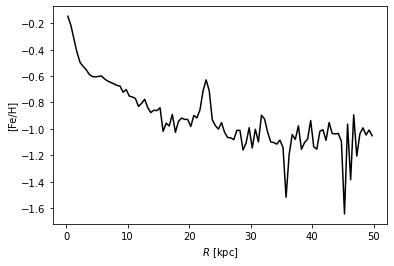

In [8]:
#plotting a metallicity(feh) profile
plt.plot(p['rbins'].in_units('kpc'),p['feh'],'k')
#plot labels
plt.xlabel('$R$ [kpc]') 
plt.ylabel('[Fe/H]')

In [9]:
#automatically creating derivatives of profiles
p_all = profile.Profile(s, rmin='.01 kpc', rmax='250 kpc')

In [10]:
#returning potential profile
p_all['pot'][0:10] 

pynbody.analysis.profile : Profile pot -- this routine assumes the disk is in the x-y plane


SimArray([-1883725.20605628, -1774955.4230129 , -1722218.33725498,
          -1690633.68613091, -1668854.69876004, -1652878.17689281,
          -1640433.23593114, -1630243.68972168, -1621605.13215674,
          -1614220.30221359], 'km**2 s**-2')

In [11]:
#returning d phi / dr from p["phi"]
p_all['d_pot'][0:10] 

SimArray([43509.6536035 , 32302.66586689, 16865.02197728, 10673.15462517,
           7551.40390378,  5684.51994658,  4527.07851737,  3765.77138574,
           3204.80569384,  2767.54060378], 'km**2 kpc**-1 s**-2')

Text(0, 0.5, '$\\sigma_{r}$')

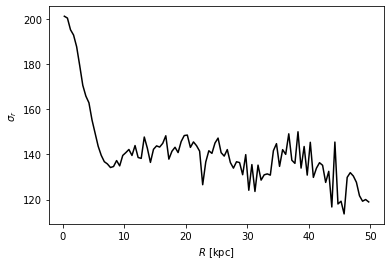

In [12]:
#calculating dispersions and root-mean-square values to get stellar velocity dispersion
plt.clf(); plt.plot(p['rbins'].in_units('kpc'),p['vr_disp'].in_units('km s^-1'),'k')
#labels
plt.xlabel('$R$ [kpc]') 
plt.ylabel('$\sigma_{r}$')

In [13]:
#making quantile profile that can return any quantile range
p_quant = profile.QuantileProfile(h[1].s, rmin = '0.1 kpc', rmax = '50 kpc')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '[Fe/H]')

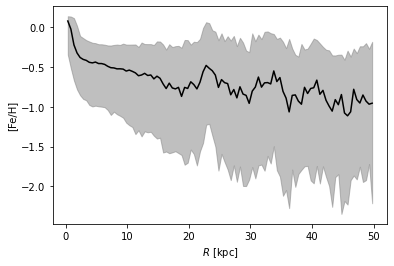

In [14]:
plt.clf() 
plt.plot(p_quant['rbins'], p_quant['feh'][:,1], 'k')
plt.fill_between(p_quant['rbins'], p_quant['feh'][:,0], p_quant['feh'][:,2], color = 'Grey', alpha=0.5)
#labels
plt.xlabel('$R$ [kpc]') 
plt.ylabel('[Fe/H]')

In [15]:
#makeing profile of stars in halo 1 according to age
s.s['age'].convert_units('Gyr')

In [16]:
p_age = profile.Profile(h[1].s, calc_x = lambda x: x.s['age'], rmax = '10 Gyr')

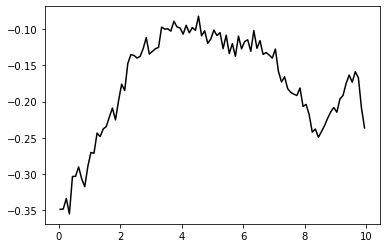

In [17]:
#plotting
plt.clf() 
plt.plot(p_age['rbins'], p_age['feh'], 'k', label = 'mean [Fe/H]')

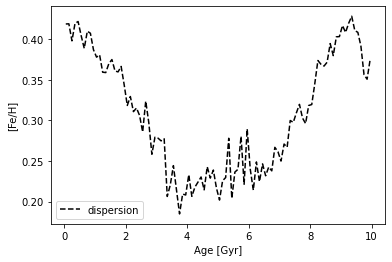

In [18]:
#customizing plot line
plt.plot(p_age['rbins'], p_age['feh_disp'], 'k--', label = 'dispersion')
#labels
plt.xlabel('Age [Gyr]') 
plt.ylabel('[Fe/H]')
plt.legend()

In [19]:
#creating vertical profile to analyze disk structure
p_vert = profile.VerticalProfile(h[1].s, '3 kpc', '5 kpc', '5 kpc')

Text(0, 0.5, '$\\rho_{\\star}$ [M$_{\\odot}$ pc$^{-3}$]')

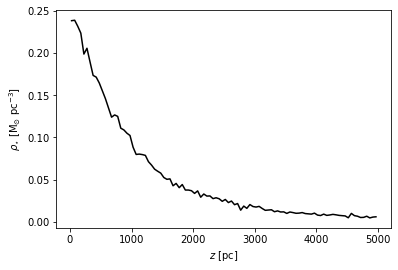

In [20]:
#specifying radial range and max z
plt.clf() 
plt.plot(p_vert['rbins'].in_units('pc'), p_vert['density'].in_units('Msol pc^-3'),'k')
#labels
plt.xlabel('$z$ [pc]') 
plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$ pc$^{-3}$]')

In [21]:
#rotating the snapshot by 60 degrees to make inclined profile
s.rotate_x(60) 

In [22]:
p_inc = profile.InclinedProfile(h[1].s, 60, rmin = '0.1 kpc', rmax = '50 kpc')